In [4]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm

In [5]:
#Timeframes
start_date = dt.datetime(2013, 3, 29)
end_date = dt.datetime(2023, 3, 29)

In [7]:
#Download Data
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override() 

apple = pdr.get_data_yahoo("AAPL", start=start_date, end=end_date)
microsoft = pdr.get_data_yahoo("MSFT", start=start_date, end=end_date)
ibm = pdr.get_data_yahoo("IBM", start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [31]:
#Collect data into a dataframe
df = pd.DataFrame({"AAPL": apple["Adj Close"],
                     "MSFT": microsoft["Adj Close"],
                        "IBM": ibm["Adj Close"]})

#show data
df.head()

,AAPL,MSFT,IBM
Date,,,
2013-04-01,13.230055,23.726900,136.306824
2013-04-02,13.257195,23.884470,137.577530
2013-04-03,13.325058,23.685434,136.486496
2013-04-04,13.193343,23.718597,135.620056
2013-04-05,13.053925,23.801535,134.400650


In [35]:
#Calculate the yearly average closing price for each stock
df.resample("A").mean()

#Format the price data to show in dollars
def price(x): return "${:.2f}".format(x)
df.resample("A").mean().applymap(price)


,AAPL,MSFT,IBM
Date,,,
2013-12-31,$14.80,$28.50,$123.77
2014-12-31,$20.56,$36.51,$120.21
2015-12-31,$27.21,$41.25,$105.31
2016-12-31,$24.20,$50.14,$105.94
2017-12-31,$35.49,$66.96,$114.89
2018-12-31,$45.24,$95.78,$109.17
2019-12-31,$50.63,$125.62,$109.07
2020-12-31,$93.77,$188.25,$103.84
2021-12-31,$139.59,$271.71,$118.62


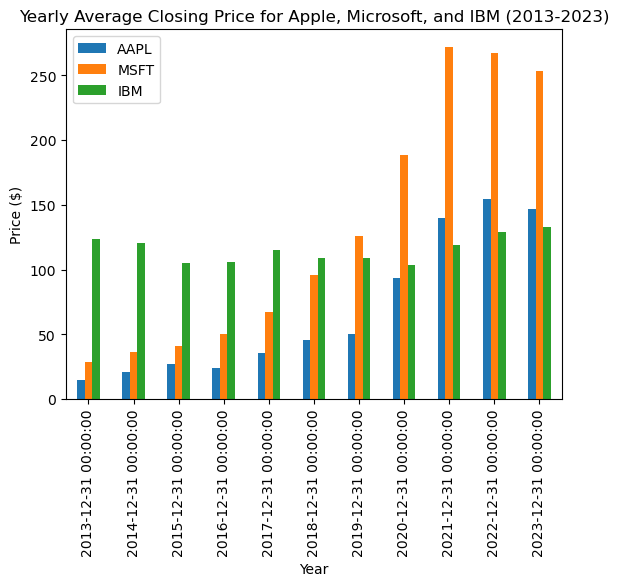

In [36]:
#Plot the yearly average closing price for each stock
df.resample("A").mean().plot.bar()

#Format the plot
plt.title("Yearly Average Closing Price for Apple, Microsoft, and IBM (2013-2023)")
plt.ylabel("Price ($)")
plt.xlabel("Year")
plt.legend(loc="upper left")
plt.show()

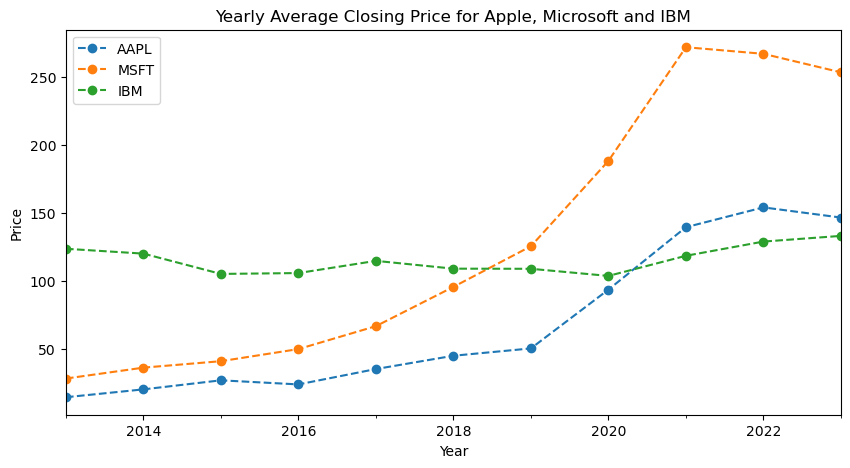

In [37]:
#Plot the yearly average closing price for each stock using a line plot with points and a legend
df.resample("A").mean().plot.line(marker="o", linestyle="--", figsize=(10,5))

#format the plot
plt.title("Yearly Average Closing Price for Apple, Microsoft and IBM")
plt.ylabel("Price")
plt.xlabel("Year")
plt.show()